In [107]:
import numpy as np

**Linear regression**

In [108]:
class Linear_Regression:
  #initiating the parameters learning_rate, no_of_iterations
  def __init__(self, learning_rate, no_of_iterations):
    self.learning_rate=learning_rate
    self.no_of_iterations=no_of_iterations

  def fit(self,X,Y):
    #no of training examples and number of features
    self.m, self.n = X.shape #no of rows and columns

    #initiating the weight and bias of the model
    self.w=np.zeros(self.n)
    self.b=0
    self.X=X
    self.Y=Y

    #implementing gradient Descent
    for i in range(self.no_of_iterations):
      self.update_weight()

  def update_weight(self):
    Y_prediction=self.predict(self.X)
    #calculate gradient
    dw=-(2*(self.X.T).dot(self.Y-Y_prediction))/self.m
    db= -2*np.sum(self.Y-Y_prediction)/self.m
    #Updating the weights
    self.w=self.w-self.learning_rate*dw
    self.b=self.b-self.learning_rate*db

  def predict(self,X):
    return X.dot(self.w)+self.b

In [63]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

Using LR model for prediction

In [109]:
#importing the dependencies
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Data Preprocessing


In [110]:
# loading the data from csv file to pandas data frame
salary_data=pd.read_csv('/content/Salary_Data[1].csv')

In [111]:
#printing first five columns of data frame
salary_data.head()

,Years of Experience,Salary
0,1.1,3943
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [112]:
#last five rows of data frame
salary_data.tail()


,Years of Experience,Salary
25,9.0,105582
26,9.5,116969
27,9.6,112635
28,10.3,122391
29,10.5,121872


In [113]:
#number of rows and columns in data frame
salary_data.shape


(30, 2)

In [114]:
#Checking for missing values
salary_data.isnull().sum()

,0
Years of Experience,0
Salary,0


In [12]:
#Dropping null values no recommended way
salary_data.dropna(subset=['Salary'],inplace=True)

In [14]:
salary_data.isnull().sum()

,0
Years of Experience,0
Salary,0


Splitting the feature and target


In [115]:
X=salary_data.iloc[:,:-1].values #will not have salary column
Y=salary_data.iloc[:,1].values   #will not have experience column
print (X)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [116]:
print (Y)

[  3943  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


Splitting data to test and train set

In [117]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33,random_state=2) #Out of total data i want 30 percent data to be test data and rest as train data. Random state is how data will be splitted
print(X_train.shape)

(20, 1)


Training the Linear Regresssion Model

In [118]:
model=Linear_Regression(learning_rate=0.02,no_of_iterations=1000)

In [119]:
model.fit(X_train,Y_train)

In [120]:
#Printing the parameters values(weight and bias)
print('weight = ',model.w[0])
print ('bias = ',model.b)

weight =  9514.400999035135
bias =  23697.406507136307


y=9514(x)+23697
salary=9514(experience)+23697

In [121]:
#Predict salary value for test data
test_data_prediction=model.predict(X_test)

In [122]:
print(test_data_prediction)

[ 36066.12780588  34163.24760607  66512.21100279  58900.69020357
  91249.65360029  80783.81250135 101715.49469922  52240.60950424
  42726.20850521  88395.33330058]


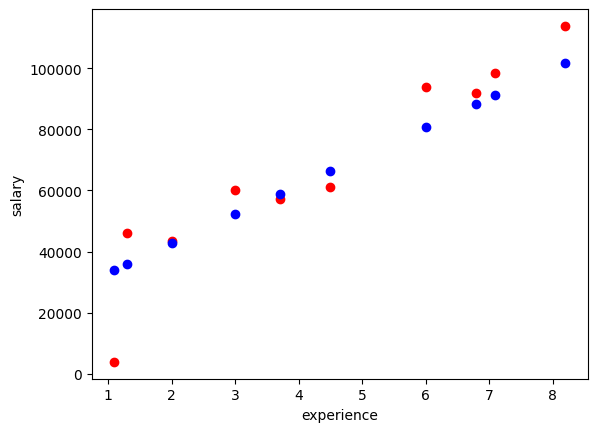

In [124]:
plt.scatter(X_test,Y_test,color='red')
plt.scatter(X_test,test_data_prediction,color='blue')
plt.xlabel('experience')
plt.ylabel('salary')
plt.show()